In [1]:

from IPython.display import display, Markdown, clear_output
import requests
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
from tradingview_ta import TA_Handler, Interval
import tradingview_ta
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


display(Markdown("# Stock Analysis & Forecasting"))
display(Markdown("Enter the stock symbol"))
stock_input = input().upper()
print("\n")
display(Markdown("How many years of data are needed for analysis? "))
No_Of_Years = int(input())
today_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=No_Of_Years*365)).strftime('%Y-%m-%d')
company_name=yf.Ticker(stock_input).info['longName']
tvobject = TA_Handler(
    symbol=stock_input,     
    screener="america",     
    exchange="NASDAQ",      
    interval=Interval.INTERVAL_1_DAY
)
clear_output(wait=True)


stock_symbol = stock_input
treasury_symbol = "^IRX"
gold_symbol = "GC=F"
nasdaq_symbol = "^IXIC"

stock = yf.download(stock_symbol, start=start_date, end=today_date)
interest_rates = yf.download(treasury_symbol, start=start_date, end=today_date)
gold = yf.download(gold_symbol, start=start_date, end=today_date)
nasdaq = yf.download(nasdaq_symbol, start=start_date, end=today_date)
clear_output(wait=True)

display(Markdown("# Stock Analysis & Forecasting"))
display(Markdown("### Data Overview"))
display(Markdown(f"Company Name: **{company_name}**"))
display(Markdown(f"Company Symbol: **{stock_input}**"))
display(Markdown(f"Time Period From: **{start_date}** to **{today_date}** (No of Years: {No_Of_Years})"))
display(Markdown(f"Data Frequency: **Daily**"))

# Stock Analysis & Forecasting

### Data Overview

Company Name: **Apple Inc.**

Company Symbol: **AAPL**

Time Period From: **2023-11-12** to **2024-11-11** (No of Years: 1)

Data Frequency: **Daily**

In [2]:

display(Markdown("### 1) Raw Data Extracted from Yahoo Finance as Follows"))
print("\n")
display(Markdown(f"**{stock_input} Stock Prices**"))
print(stock)
print("\n")
display(Markdown("**Interest Rates**"))
print(interest_rates)
print("\n")
display(Markdown("**Gold Rates**"))
print(gold)
print("\n")
display(Markdown("**NASDAQ Index**"))
print(nasdaq)

### 1) Raw Data Extracted from Yahoo Finance as Follows

**AAPL Stock Prices**

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-11-13  185.820007  186.029999  184.210007  184.800003  183.899063   
2023-11-14  187.699997  188.110001  186.300003  187.440002  186.526199   
2023-11-15  187.850006  189.500000  187.779999  188.009995  187.093430   
2023-11-16  189.570007  190.960007  188.649994  189.710007  188.785141   
2023-11-17  190.250000  190.380005  188.570007  189.690002  188.765244   
...                ...         ...         ...         ...         ...   
2024-11-04  220.990005  222.789993  219.710007  222.009995  221.766006   
2024-11-05  221.800003  223.949997  221.139999  223.449997  223.204422   
2024-11-06  222.610001  226.070007  221.190002  222.720001  222.475235   
2024-11-07  224.630005  227.880005  224.570007  227.479996  227.229996   
2024-11-08  227.169998  228.660004  226.410004  226.960007  226.960007   

              Volume  
Date          

**Interest Rates**

             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2023-11-13  5.248  5.260  5.248  5.260      5.260       0
2023-11-14  5.280  5.280  5.248  5.253      5.253       0
2023-11-15  5.250  5.258  5.225  5.255      5.255       0
2023-11-16  5.248  5.248  5.230  5.243      5.243       0
2023-11-17  5.233  5.238  5.230  5.233      5.233       0
...           ...    ...    ...    ...        ...     ...
2024-11-04  4.395  4.420  4.385  4.418      4.418       0
2024-11-05  4.425  4.428  4.420  4.423      4.423       0
2024-11-06  4.428  4.435  4.420  4.430      4.430       0
2024-11-07  4.413  4.428  4.403  4.420      4.420       0
2024-11-08  4.413  4.423  4.410  4.423      4.423       0

[250 rows x 6 columns]




**Gold Rates**

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-11-13  1939.900024  1947.199951  1934.000000  1945.500000  1945.500000   
2023-11-14  1965.800049  1965.800049  1961.800049  1961.800049  1961.800049   
2023-11-15  1962.800049  1962.800049  1960.000000  1960.099976  1960.099976   
2023-11-16  1965.300049  1983.900024  1964.599976  1983.900024  1983.900024   
2023-11-17  1982.500000  1984.000000  1979.800049  1981.599976  1981.599976   
...                 ...          ...          ...          ...          ...   
2024-11-04  2736.500000  2737.100098  2736.100098  2736.100098  2736.100098   
2024-11-05  2743.000000  2743.899902  2740.300049  2740.300049  2740.300049   
2024-11-06  2734.500000  2734.500000  2659.399902  2667.600098  2667.600098   
2024-11-07  2662.500000  2699.100098  2662.500000  2698.399902  2698.399902   
2024-11-08  2688.500000  2694.600098  2682.899902  2

**NASDAQ Index**

                    Open          High           Low         Close  \
Date                                                                 
2023-11-13  13745.959961  13805.110352  13687.780273  13767.740234   
2023-11-14  14015.370117  14124.059570  14003.139648  14094.379883   
2023-11-15  14147.269531  14194.360352  14060.700195  14103.839844   
2023-11-16  14066.879883  14130.450195  14033.790039  14113.669922   
2023-11-17  14101.440430  14154.320312  14063.929688  14125.480469   
...                  ...           ...           ...           ...   
2024-11-04  18220.429688  18308.300781  18112.830078  18179.980469   
2024-11-05  18250.710938  18449.679688  18250.710938  18439.169922   
2024-11-06  18772.759766  19000.500000  18730.210938  18983.470703   
2024-11-07  19084.429688  19301.699219  19084.429688  19269.460938   
2024-11-08  19255.140625  19318.560547  19224.429688  19286.779297   

               Adj Close      Volume  
Date                                  
2023-11-13 

In [3]:

display(Markdown("### 2) Data Cleaning & Transformation"))
print("\n")
display(Markdown("##### 2a) Missing Value"))

def check_missing_values(df, name):
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        display(Markdown(f"*Missing Values in {name}"))
        display(missing_values[missing_values > 0])
    else:
        display(Markdown(f"* No Missing Values in {name}"))


def check_duplicate_dates(df, name):
    duplicate_dates = df[df.index.duplicated()]
    if not duplicate_dates.empty:
        display(Markdown(f"* Duplicate Dates in {name}"))
        display(Markdown(duplicate_dates))
    else:
        display(Markdown(f"* No Duplicate Dates in {name}"))

check_missing_values(stock, "Stock")
check_missing_values(interest_rates, "Interest Rates")
check_missing_values(gold, "Gold")
check_missing_values(nasdaq, "NASDAQ")
print("\n")

display(Markdown("##### 2b) Duplicate Dates"))

check_duplicate_dates(stock, "Stock")
check_duplicate_dates(interest_rates, "Interest Rates")
check_duplicate_dates(gold, "Gold")
check_duplicate_dates(nasdaq, "NASDAQ")
print("\n")

display(Markdown("##### 2c) Merging Required Columns"))
print("\n")
combined_data = pd.concat([stock['Close'], stock['Volume'], interest_rates['Close'], gold['Close'], nasdaq['Close']], axis=1)
stock_price_column_name = f'{stock_input} Price'
stock_volume_column_name = f'{stock_input} Volume'
combined_data.columns = [stock_price_column_name, stock_volume_column_name, 'Interest Rate', 'Gold Prices', 'NASDAQ Index']
combined_data.sort_index(ascending=True, inplace=True)
print(combined_data)
print("\n")
# Save to CSV combined_data.to_csv(f'{stock_input}_Stock Analysis.csv')

### 2) Data Cleaning & Transformation

##### 2a) Missing Value

* No Missing Values in Stock

* No Missing Values in Interest Rates

* No Missing Values in Gold

* No Missing Values in NASDAQ

##### 2b) Duplicate Dates

* No Duplicate Dates in Stock

* No Duplicate Dates in Interest Rates

* No Duplicate Dates in Gold

* No Duplicate Dates in NASDAQ

##### 2c) Merging Required Columns



            AAPL Price  AAPL Volume  Interest Rate  Gold Prices  NASDAQ Index
Date                                                                         
2023-11-13  184.800003     43627500          5.260  1945.500000  13767.740234
2023-11-14  187.440002     60108400          5.253  1961.800049  14094.379883
2023-11-15  188.009995     53790500          5.255  1960.099976  14103.839844
2023-11-16  189.710007     54412900          5.243  1983.900024  14113.669922
2023-11-17  189.690002     50922700          5.233  1981.599976  14125.480469
...                ...          ...            ...          ...           ...
2024-11-04  222.009995     44944500          4.418  2736.100098  18179.980469
2024-11-05  223.449997     28111300          4.423  2740.300049  18439.169922
2024-11-06  222.720001     54561100          4.430  2667.600098  18983.470703
2024-11-07  227.479996     42137700          4.420  2698.399902  19269.460938
2024-11-08  226.960007     38308700          4.423  2687.50000

In [4]:

display(Markdown("### 3) Data Statistics"))
print("\n")
print(combined_data.info())
summary_stats = combined_data.describe()
print("\n")
print(summary_stats)
print("\n")

### 3) Data Statistics



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-11-13 to 2024-11-08
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AAPL Price     250 non-null    float64
 1   AAPL Volume    250 non-null    int64  
 2   Interest Rate  250 non-null    float64
 3   Gold Prices    250 non-null    float64
 4   NASDAQ Index   250 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.8 KB
None


       AAPL Price   AAPL Volume  Interest Rate  Gold Prices  NASDAQ Index
count  250.000000  2.500000e+02     250.000000   250.000000    250.000000
mean   200.472520  5.777828e+07       5.081112  2306.449193  16572.527941
std     21.449607  3.041410e+07       0.267047   231.109674   1321.706111
min    165.000000  2.404830e+07       4.400000  1945.500000  13767.740234
25%    184.174995  4.232095e+07       5.065500  2045.949951  15628.267578
50%    193.745003  5.091195e+07       5.218000  2330.199951  1640

### 4) Data Distribution

##### 4a) Histograms

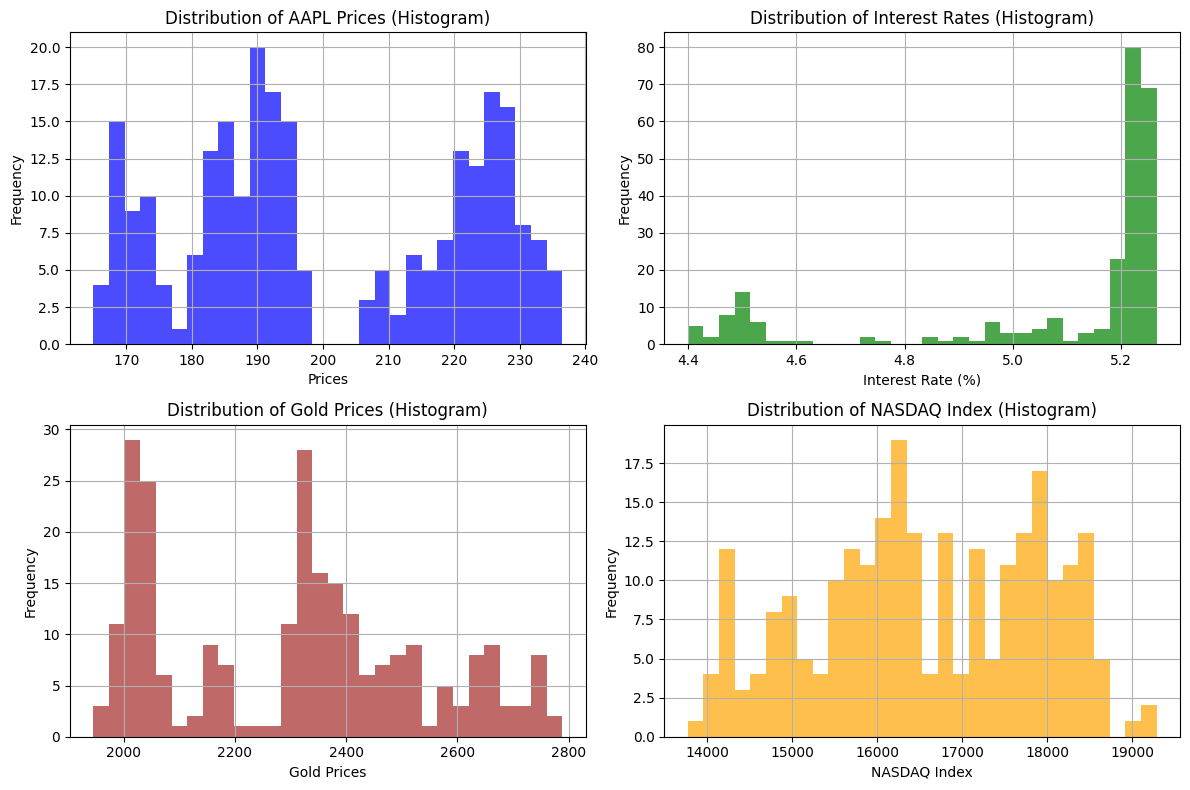

##### 4b) Box Plots

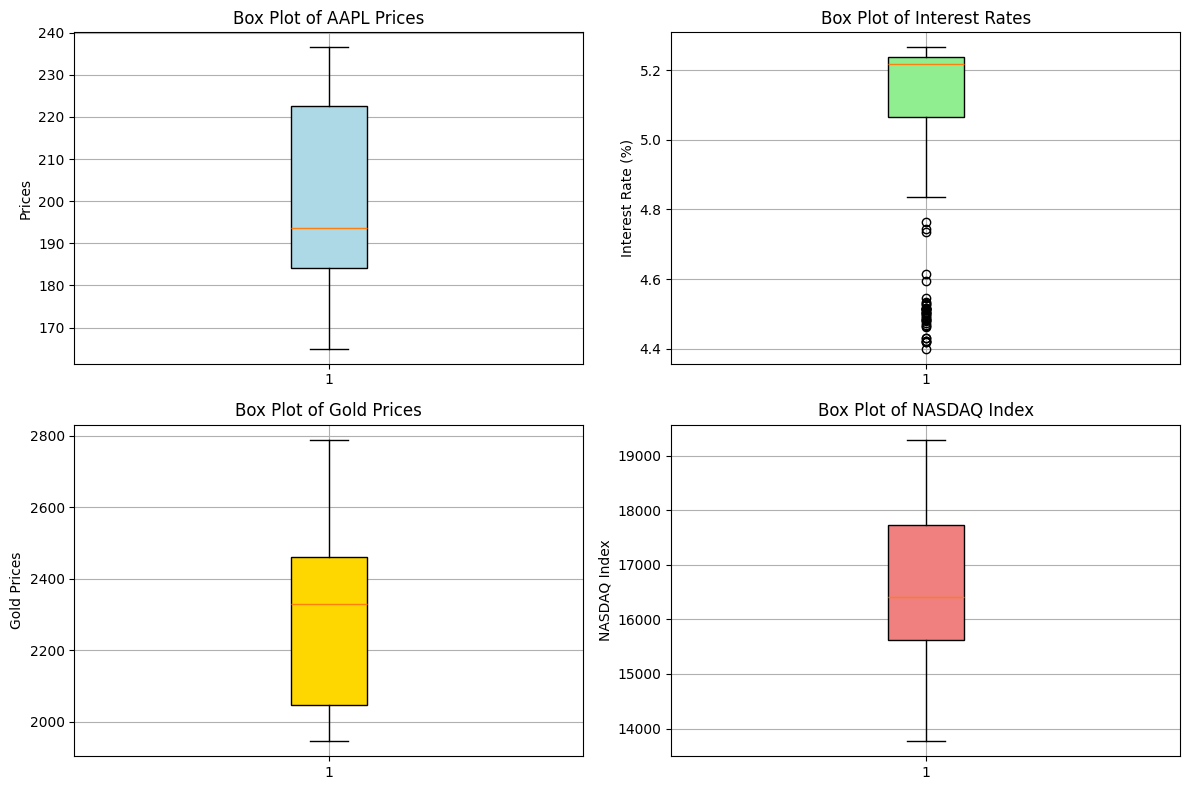

##### 4c) AAPL Volume Distributuon

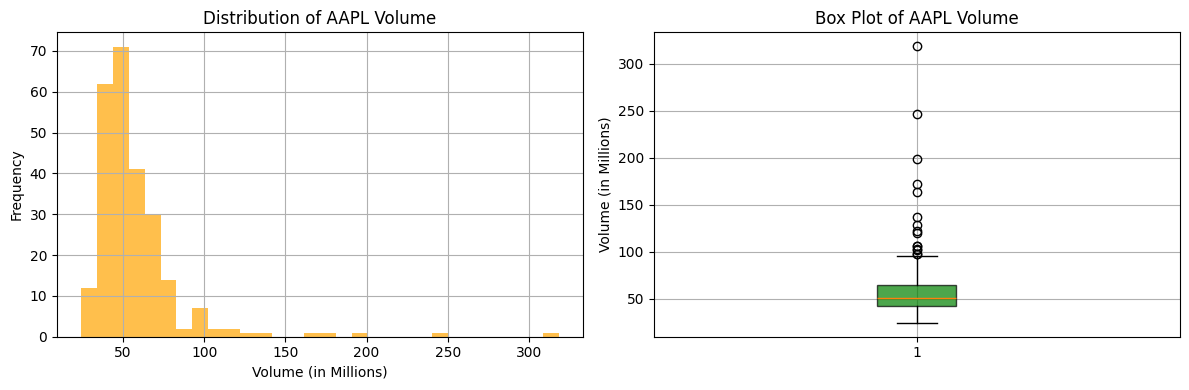

In [5]:

display(Markdown("### 4) Data Distribution"))

display(Markdown("##### 4a) Histograms"))
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(combined_data[stock_price_column_name], bins=30, alpha=0.7, color='blue')
plt.title(f'Distribution of {stock_input} Prices (Histogram)')
plt.grid()
plt.xlabel('Prices')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(combined_data['Interest Rate'], bins=30, alpha=0.7, color='green')
plt.title('Distribution of Interest Rates (Histogram)')
plt.grid()
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(combined_data['Gold Prices'], bins=30, alpha=0.7, color='brown')
plt.title('Distribution of Gold Prices (Histogram)')
plt.grid()
plt.xlabel('Gold Prices')
plt.ylabel('Frequency')


plt.subplot(2, 2, 4)
plt.hist(combined_data['NASDAQ Index'], bins=30, alpha=0.7, color='orange')
plt.title('Distribution of NASDAQ Index (Histogram)')
plt.grid()
plt.xlabel('NASDAQ Index')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n")
display(Markdown("##### 4b) Box Plots"))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.boxplot(combined_data[stock_price_column_name], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title(f'Box Plot of {stock_input} Prices')
plt.grid()
plt.ylabel('Prices')

plt.subplot(2, 2, 2)
plt.boxplot(combined_data['Interest Rate'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plot of Interest Rates')
plt.grid()
plt.ylabel('Interest Rate (%)')

plt.subplot(2, 2, 3)
plt.boxplot(combined_data['Gold Prices'], patch_artist=True, boxprops=dict(facecolor='gold'))
plt.title('Box Plot of Gold Prices')
plt.grid()
plt.ylabel('Gold Prices')

plt.subplot(2, 2, 4)
plt.boxplot(combined_data['NASDAQ Index'], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Box Plot of NASDAQ Index')
plt.grid()
plt.ylabel('NASDAQ Index')

plt.tight_layout()
plt.show()

print("\n")
display(Markdown(f"##### 4c) {stock_input} Volume Distributuon"))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(combined_data[stock_volume_column_name]/1000000, bins=30, alpha=0.7, color='orange')
plt.title(f'Distribution of {stock_input} Volume')
plt.grid()
plt.xlabel('Volume (in Millions)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # 2nd subplot
plt.boxplot(combined_data[stock_volume_column_name]/1000000, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.7,))
plt.title(f'Box Plot of {stock_input} Volume')
plt.grid()
plt.ylabel('Volume (in Millions)')


plt.tight_layout()
plt.show()


### 5) Trend Analysis

##### 5a) Price Trend

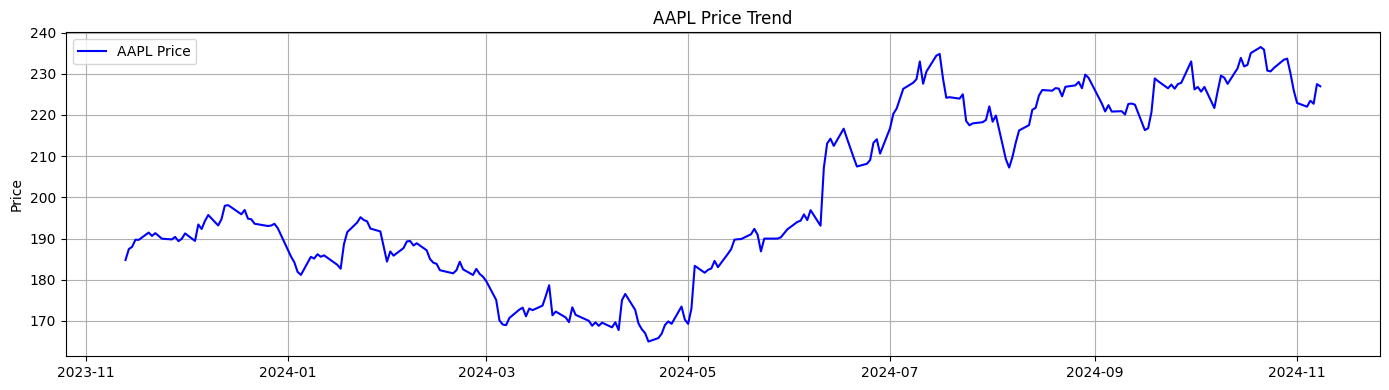

##### 5b) Price and NASDAQ Index Trend

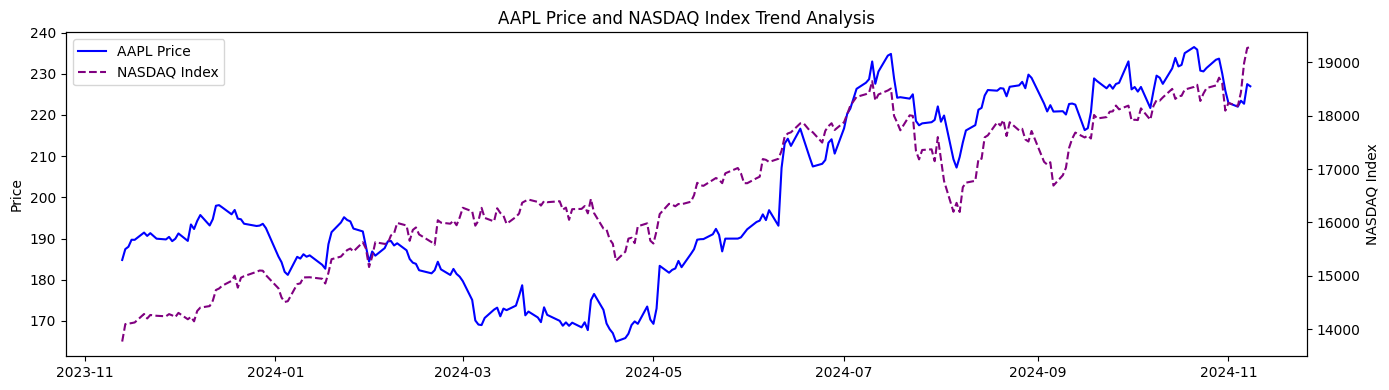

##### 5c) Price and Interest Rate Trend

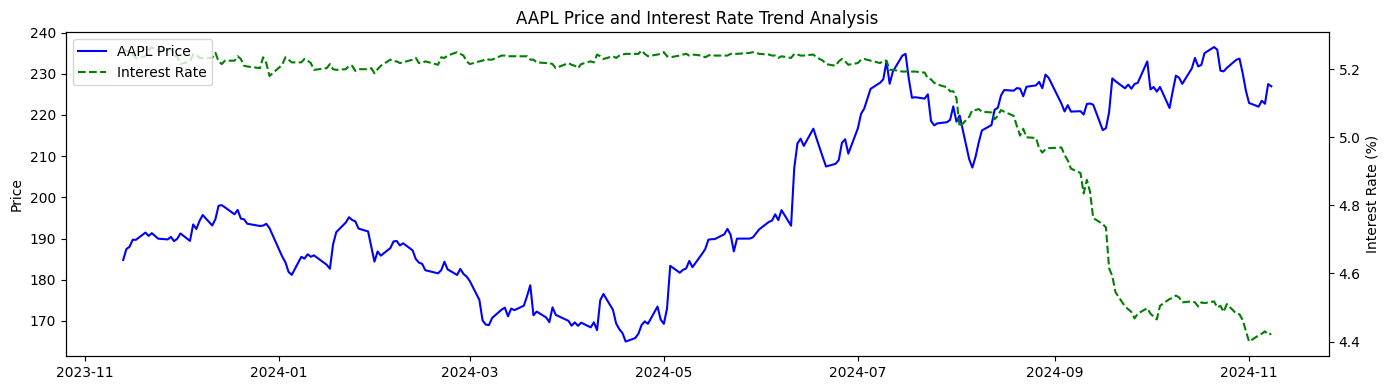

##### 5d) Price and Gold Rate Trend

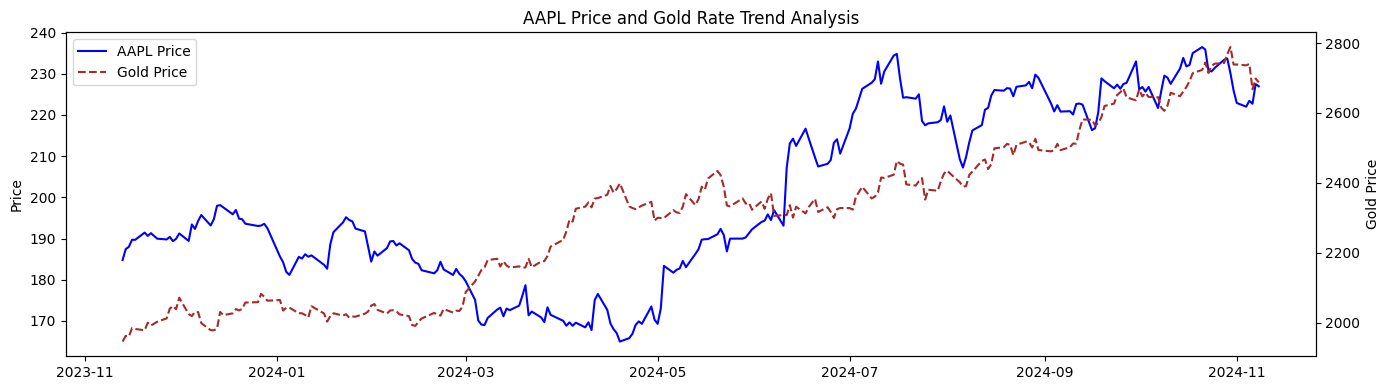

In [6]:

display(Markdown("### 5) Trend Analysis"))

display(Markdown("##### 5a) Price Trend"))

plt.figure(figsize=(14, 4))

plt.plot(combined_data.index, combined_data[stock_price_column_name], label=f'{stock_input} Price', color='blue')
plt.title(f'{stock_input} Price Trend')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

print("\n")
display(Markdown("##### 5b) Price and NASDAQ Index Trend"))

plt.figure(figsize=(14, 4))

line1, = plt.plot(combined_data.index, combined_data[stock_price_column_name], label=f'{stock_input} Price', color='blue')
plt.title(f'{stock_input} Price and NASDAQ Index Trend Analysis')
plt.ylabel('Price')
plt.grid(False)

ax2 = plt.gca().twinx()
line2, = ax2.plot(combined_data.index, combined_data['NASDAQ Index'], 
                  label='NASDAQ Index', color='purple', linestyle='--')
ax2.set_ylabel('NASDAQ Index')
ax2.grid(False)

plt.xticks(rotation=0)

lines = [line1, line2]
labels = [line1.get_label(), line2.get_label()]
plt.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

print("\n")
display(Markdown("##### 5c) Price and Interest Rate Trend"))

plt.figure(figsize=(14, 4))

line1, = plt.plot(combined_data.index, combined_data[stock_price_column_name], label=f'{stock_input} Price', color='blue')
plt.title(f'{stock_input} Price and Interest Rate Trend Analysis')
plt.ylabel('Price')
plt.grid(False)

ax2 = plt.gca().twinx()
line2, = ax2.plot(combined_data.index, combined_data['Interest Rate'], 
                  label='Interest Rate', color='green', linestyle='--')
ax2.set_ylabel('Interest Rate (%)')
ax2.grid(False)

plt.xticks(rotation=0)

lines = [line1, line2]
labels = [line1.get_label(), line2.get_label()]
plt.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

print("\n")
display(Markdown("##### 5d) Price and Gold Rate Trend"))

plt.figure(figsize=(14, 4))

line1, = plt.plot(combined_data.index, combined_data[stock_price_column_name], label=f'{stock_input} Price', color='blue')
plt.title(f'{stock_input} Price and Gold Rate Trend Analysis')
plt.ylabel('Price')
plt.grid(False)

ax2 = plt.gca().twinx()
line2, = ax2.plot(combined_data.index, combined_data['Gold Prices'], 
                  label='Gold Price', color='brown', linestyle='--')
ax2.set_ylabel('Gold Price')
ax2.grid(False)

plt.xticks(rotation=0)

lines = [line1, line2]
labels = [line1.get_label(), line2.get_label()]
plt.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

### 6) Correlation Analysis: AAPL Stock Price vs. Key Market Indicators

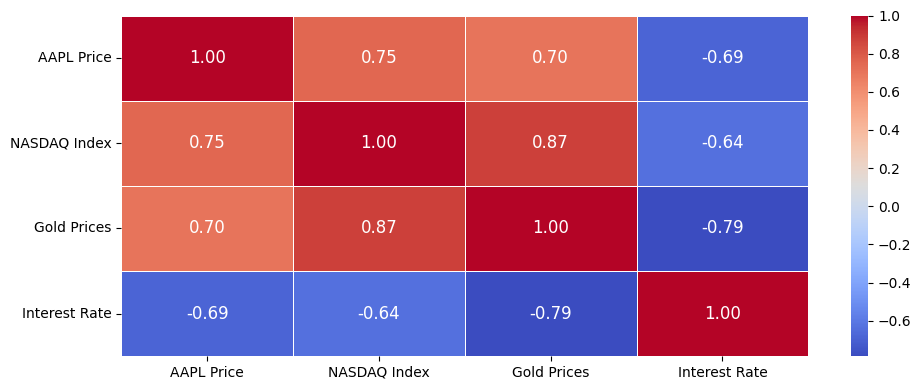

In [7]:

display(Markdown(f"### 6) Correlation Analysis: {stock_input} Stock Price vs. Key Market Indicators"))

data_for_corr = combined_data[[stock_price_column_name, 'NASDAQ Index', 'Gold Prices', 'Interest Rate']]

correlation_matrix = data_for_corr.corr()

plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt='.2f', annot_kws={"size": 12})
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 7) Technical Analysis

##### 7a) Support & Resistance Levels

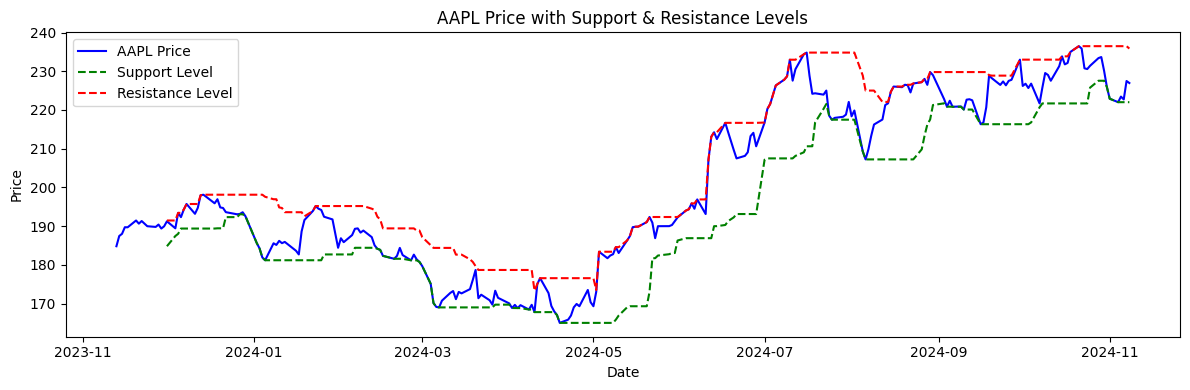

##### 7b) Moving Average Chart

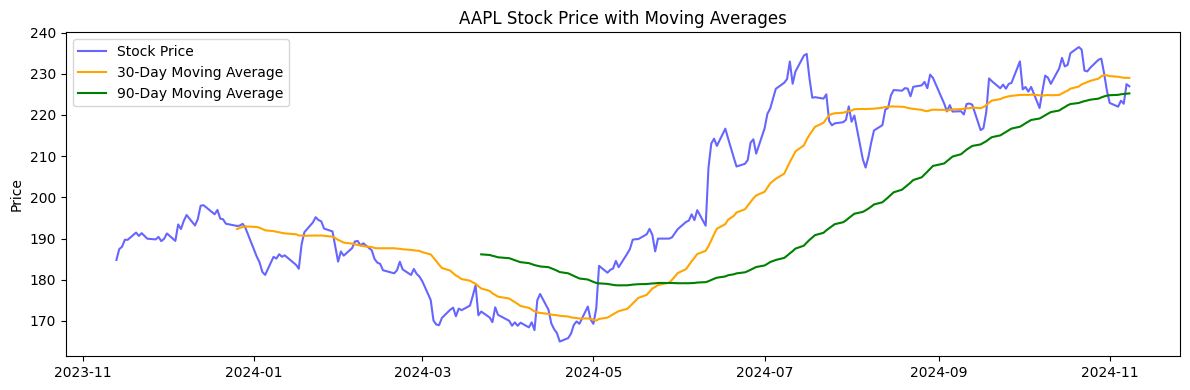

##### 7c) Volume Analysis

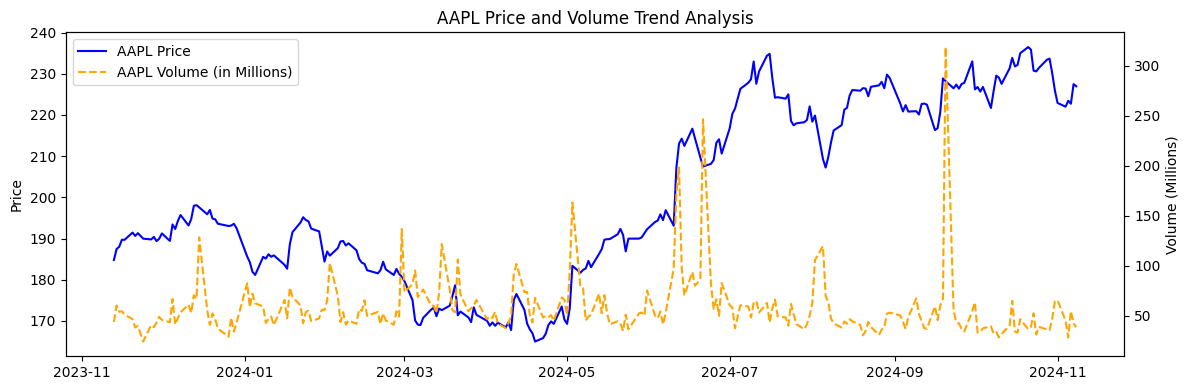

##### 7d) Volatility Analysis

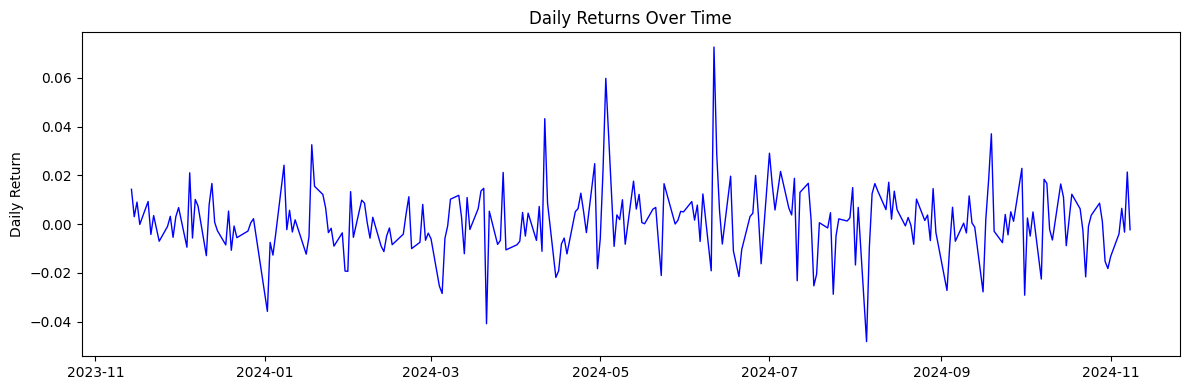

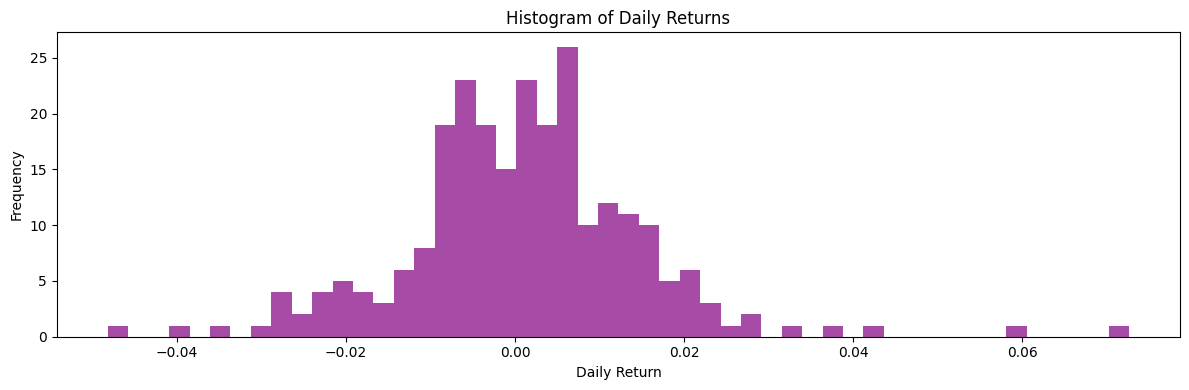

##### 7e) Relative Strength Index (RSI)

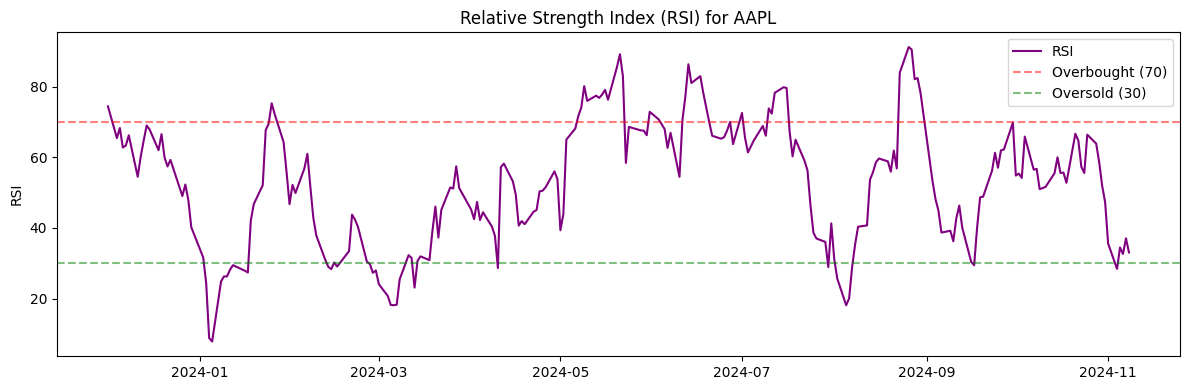

In [8]:

display(Markdown(f"### 7) Technical Analysis"))

display(Markdown("##### 7a) Support & Resistance Levels"))

n = 14

combined_data['Support'] = combined_data[stock_price_column_name].rolling(window=n).min()
combined_data['Resistance'] = combined_data[stock_price_column_name].rolling(window=n).max()

plt.figure(figsize=(12, 4))

plt.plot(combined_data.index, combined_data[stock_price_column_name], label=f'{stock_input} Price', color='blue')
plt.plot(combined_data.index, combined_data['Support'], label='Support Level', color='green', linestyle='--')
plt.plot(combined_data.index, combined_data['Resistance'], label='Resistance Level', color='red', linestyle='--')


plt.title(f'{stock_input} Price with Support & Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

print("\n")
display(Markdown("##### 7b) Moving Average Chart"))

combined_data['30-Day MA'] = combined_data[stock_price_column_name].rolling(window=30).mean()
combined_data['90-Day MA'] = combined_data[stock_price_column_name].rolling(window=90).mean()

plt.figure(figsize=(12, 4))
plt.plot(combined_data.index, combined_data[stock_price_column_name], label='Stock Price', color='blue', alpha=0.6)
plt.plot(combined_data.index, combined_data['30-Day MA'], label='30-Day Moving Average', color='orange')
plt.plot(combined_data.index, combined_data['90-Day MA'], label='90-Day Moving Average', color='green')
plt.title(f'{stock_input} Stock Price with Moving Averages')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

print("\n")
display(Markdown("##### 7c) Volume Analysis"))

plt.figure(figsize=(12, 4))

line1, = plt.plot(combined_data.index, combined_data[stock_price_column_name], label=f'{stock_input} Price', color='blue')
plt.title(f'{stock_input} Price and Volume Trend Analysis')
plt.ylabel('Price')
plt.grid(False)

ax2 = plt.gca().twinx()
line2, = ax2.plot(combined_data.index, combined_data[stock_volume_column_name] / 1_000_000, 
                  label=f'{stock_input} Volume (in Millions)', color='orange', linestyle='--')
ax2.set_ylabel('Volume (Millions)')
ax2.grid(False)

plt.xticks(rotation=0)

lines = [line1, line2]
labels = [line1.get_label(), line2.get_label()]
plt.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

print("\n")
display(Markdown("##### 7d) Volatility Analysis"))

combined_data['Daily Price Change'] = combined_data[stock_price_column_name].diff(1)
combined_data['Daily Return'] = combined_data[stock_price_column_name].pct_change(1)


plt.figure(figsize=(12, 4))
plt.plot(combined_data.index, combined_data['Daily Return'], color='blue', linewidth=1)
plt.title('Daily Returns Over Time')
plt.ylabel('Daily Return')
plt.tight_layout()
plt.show()

print("\n")
plt.figure(figsize=(12, 4))
plt.hist(combined_data['Daily Return'], bins=50, color='purple', alpha=0.7)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\n")
display(Markdown("##### 7e) Relative Strength Index (RSI)"))

window = 14

delta = combined_data[stock_price_column_name].diff(1)

# Calculate gains and losses
gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

# Calculate Relative Strength (RS) and RSI
rs = gain / loss
combined_data['RSI'] = 100 - (100 / (1 + rs))

# Plotting the RSI
plt.figure(figsize=(12, 4))
plt.plot(combined_data.index, combined_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold (30)')
plt.title(f'Relative Strength Index (RSI) for {stock_input}')
plt.ylabel('RSI')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

### 8) AutoRegressive Integrated Moving Average (ARIMA) - Predictive Modeling

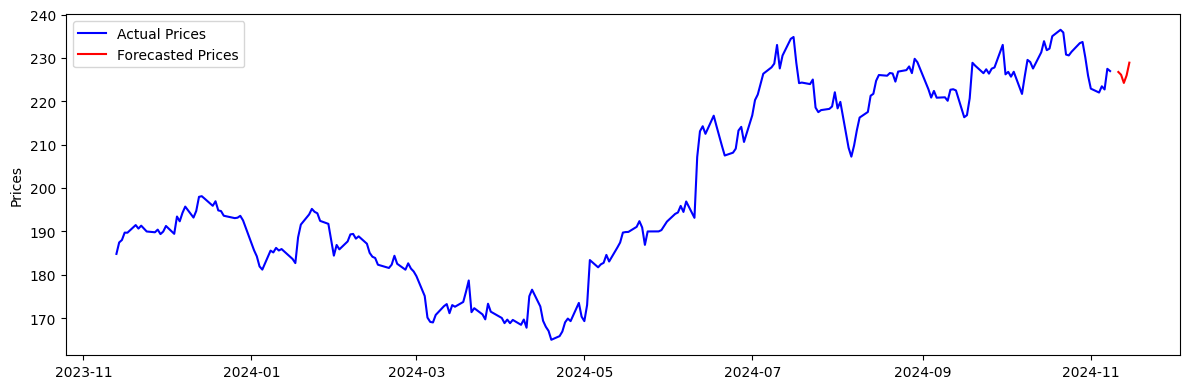

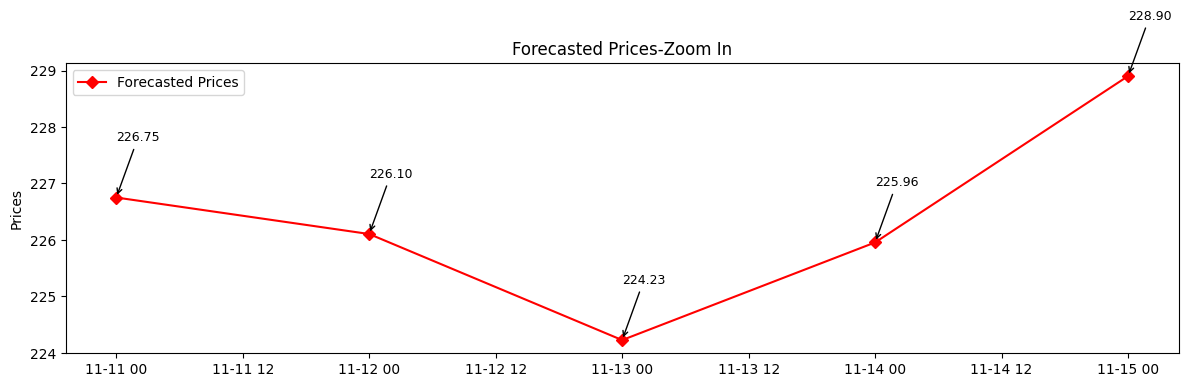

In [9]:

model = ARIMA(stock['Close'], order=(45, 1, 5))
arima_result = model.fit()

forecast_steps = 5
forecast = arima_result.forecast(steps=forecast_steps)

forecast_dates = pd.date_range(stock.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast_df = pd.DataFrame({'Forecasted Date': forecast_dates, 'Forecasted Price': forecast})
forecast_df.set_index('Forecasted Date', inplace=True)
clear_output(wait=True)
display(Markdown(f"### 8) AutoRegressive Integrated Moving Average (ARIMA) - Predictive Modeling"))

plt.figure(figsize=(12, 4))
plt.plot(stock.index, stock['Close'], label="Actual Prices", color='blue')
plt.plot(forecast_dates, forecast, label="Forecasted Prices", color='red')
plt.ylabel('Prices')
plt.legend()
plt.tight_layout()
plt.show()
print("\n")
plt.figure(figsize=(12, 4))
plt.plot(forecast_df.index, forecast_df['Forecasted Price'], label="Forecasted Prices", color='red', marker='D')

for date, price in zip(forecast_df.index, forecast_df['Forecasted Price']):
    plt.annotate(f'{price:.2f}', xy=(date, price), xytext=(date, price + 1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=9)

plt.ylabel('Prices')
plt.legend()
plt.tight_layout()
plt.title('Forecasted Prices-Zoom In')
plt.show()

In [10]:

display(Markdown(f"### 9) Conclusion & Recommendations "))
print("\n")
indicators = tvobject.get_analysis().indicators

display(Markdown("##### 9a) Holistic Recommendation Based on Indicators"))
display(Markdown(f"Overall: **{indicators['Recommend.All']:.2f}**"))
display(Markdown("Values near 0 suggest neutral/hold signals,<br>values near 1 indicate stronger buy signals,<br>and negative values represent sell recommendations."))
print("\n")

display(Markdown("##### 9b) Momentum Indicators"))
display(Markdown(f"Relative Strength Index: **{indicators['RSI']:.2f}**"))
display(Markdown("Values above 70 suggest overbought,<br>below 30 indicate oversold,<br>and between 30-70 signal neutral or hold."))
print("\n")

display(Markdown("##### 9c) Trend Analysis"))
display(Markdown(f"Stoch.RSI.K (Direction): **{indicators['Stoch.RSI.K']:.2f}**"))
display(Markdown("Values below 50 indicate bearish momentum,<br>while values above 50 suggest bullish momentum."))
display(Markdown("<br>"))

display(Markdown(f"Average Directional Index (Directional Strength): **{indicators['ADX']:.2f}**"))
display(Markdown("Less than 20: Weak trend<br>20-40: Moderate trend<br>40-60: Strong trend<br>Greater than 60: Very strong trend"))
print("\n")

display(Markdown("##### 9d) Volatility Indicators"))
display(Markdown(f"Bollinger Bands Power: **{indicators['BBPower']:.2f}**"))
display(Markdown("Negative values: Weak momentum, low volatility<br>Zero: Neutral momentum<br>Positive values: Strong momentum, high volatility"))
print("\n")

display(Markdown("##### 9e) Moving Averages (Exponential/Simple)"))
display(Markdown(f"Recommendation on MA - Overall: **{indicators['Recommend.MA']:.2f}**"))
display(Markdown("Values near 0 suggest neutral/hold signals,<br>values near 1 indicate stronger buy signals,<br>and negative values represent sell recommendations."))
print("\n")
display(Markdown(f"EMA5: **{indicators['EMA5']:.2f}**"))
display(Markdown(f"EMA10: **{indicators['EMA10']:.2f}**"))
display(Markdown(f"EMA20: **{indicators['EMA20']:.2f}**"))
display(Markdown(f"EMA30: **{indicators['EMA30']:.2f}**"))
display(Markdown(f"EMA50: **{indicators['EMA50']:.2f}**"))
display(Markdown(f"EMA100: **{indicators['EMA100']:.2f}**"))
display(Markdown(f"EMA200: **{indicators['EMA200']:.2f}**"))
display(Markdown("<br>"))
display(Markdown(f"SMA5: **{indicators['SMA5']:.2f}**"))
display(Markdown(f"SMA10: **{indicators['SMA10']:.2f}**"))
display(Markdown(f"SMA20: **{indicators['SMA20']:.2f}**"))
display(Markdown(f"SMA30: **{indicators['SMA30']:.2f}**"))
display(Markdown(f"SMA50: **{indicators['SMA50']:.2f}**"))
display(Markdown(f"SMA100: **{indicators['SMA100']:.2f}**"))
display(Markdown(f"SMA200: **{indicators['SMA200']:.2f}**"))
print("\n")

display(Markdown("##### 9f) Support/Resistance Levels (Pivot.M.Classic)"))
display(Markdown(f"S1: **{indicators['Pivot.M.Classic.S1']:.2f}**, S2: **{indicators['Pivot.M.Classic.S2']:.2f}**, S3: **{indicators['Pivot.M.Classic.S3']:.2f}**"))
display(Markdown(f"R1: **{indicators['Pivot.M.Classic.R1']:.2f}**, R2: **{indicators['Pivot.M.Classic.R2']:.2f}**, R3: **{indicators['Pivot.M.Classic.R3']:.2f}**"))
print("\n")

display(Markdown("##### 9g) Forcasted Price - ARIMA"))
print(forecast_df)


### 9) Conclusion & Recommendations 

##### 9a) Holistic Recommendation Based on Indicators

Overall: **0.09**

Values near 0 suggest neutral/hold signals,<br>values near 1 indicate stronger buy signals,<br>and negative values represent sell recommendations.

##### 9b) Momentum Indicators

Relative Strength Index: **48.43**

Values above 70 suggest overbought,<br>below 30 indicate oversold,<br>and between 30-70 signal neutral or hold.

##### 9c) Trend Analysis

Stoch.RSI.K (Direction): **31.30**

Values below 50 indicate bearish momentum,<br>while values above 50 suggest bullish momentum.

<br>

Average Directional Index (Directional Strength): **13.75**

Less than 20: Weak trend<br>20-40: Moderate trend<br>40-60: Strong trend<br>Greater than 60: Very strong trend

##### 9d) Volatility Indicators

Bollinger Bands Power: **0.72**

Negative values: Weak momentum, low volatility<br>Zero: Neutral momentum<br>Positive values: Strong momentum, high volatility

##### 9e) Moving Averages (Exponential/Simple)

Recommendation on MA - Overall: **0.27**

Values near 0 suggest neutral/hold signals,<br>values near 1 indicate stronger buy signals,<br>and negative values represent sell recommendations.

EMA5: **225.86**

EMA10: **226.68**

EMA20: **227.76**

EMA30: **227.76**

EMA50: **226.48**

EMA100: **220.46**

EMA200: **209.21**

<br>

SMA5: **224.52**

SMA10: **226.86**

SMA20: **229.89**

SMA30: **228.99**

SMA50: **226.82**

SMA100: **224.02**

SMA200: **202.92**

##### 9f) Support/Resistance Levels (Pivot.M.Classic)

S1: **219.00**, S2: **212.08**, S3: **195.92**

R1: **235.16**, R2: **244.40**, R3: **260.56**

##### 9g) Forcasted Price - ARIMA

                 Forecasted Price
Forecasted Date                  
2024-11-11             226.751474
2024-11-12             226.104796
2024-11-13             224.226466
2024-11-14             225.955741
2024-11-15             228.901716
